#### Wesleyan University ASTR 221

## Problem Set 1.2: The Milky Way's gravitational potential

**(1 point) Your Name: Joshua Andres Grajales**

In this problem set, we will be constructing a model of the Milky Way in three-dimensional space based on what we know about the density profiles of the dark matter and stellar components of the Galaxy, and measuring the contribution of these components to the rotation curve.  (We'll neglect the gas for now - it is obviously an important part of the system, but its gravity is subdominant on the scale we'll be looking at.)

This involves two major steps:

1) Creating three-dimensional arrays of stellar and dark matter mass as a function of xyz position by sampling the NFW, exponential disk, and de Vaucouleurs profiles, and

2) Calculating the resulting gravitational force as a function of radius.

Fill in your code below to complete the calculations and produce the indicated outputs.  Save your work in this notebook file and submit it by re-uploading it to Moodle (in .ipynb format).  I will check your work by going to Kernel -> Restart and Run All in the menu above so I suggest you do the same before submitting!

In my examples in class I have used NumPy arrays as my data structure just because I find them the most straightforward to work with, but you are welcome to use something else (e.g. Pandas DataFrames) if you prefer.

Good coding practice (e.g., organization and commenting) is not an explicit part of my grading rubric, but it will make it a lot easier for me to parse your code in the event that something is incorrect.  You are likely to get much more partial credit if your code is well-commented and I can understand what you were trying to do!

I'll start off by importing a few packages for you:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
from math import pi

## Construct your grid (9 points)

Create a three-dimensional grid which goes from -50 to +50 kpc in each direction.  I recommend using a Cartesian (xyz) grid to make your life easier, but you could use a cylindrical (r, theta, z) grid if you want.  Spherical coordinates are not recommended.

The final version of your grid should have at least 200 cells in each dimension ($8 \times 10^6$ cells total), but you may want to start off with a smaller number of cells to speed things up while you are actively working and testing your code.

(You are welcome to play around with extending the size of the domain or increasing the resolution as much as you like to improve the accuracy of the calculation, but these numbers are reasonable minima that any laptop should be able to handle.)

In [146]:
# YOUR CODE HERE: Create 3D arrays representing the coordinates 
# in a volume of (100 kpc)^3 with the origin at the center.

# as in the 3d gridding tutorial we use the meshgrid function: we are given that 
xmin = -50
xmax = 50

# now we must select dx such that we have at least 200 cells --> (xmax-ximin)/400 = dx
# why dx = 0.25
dx = 0.5
ncells = int((xmax-xmin)/dx)
dx = (xmax-xmin)/ncells

# use linpsace(start, stop, number of values); why did we subtract dx/2 to keep our points of edges of domain 
xmids = np.linspace(xmin, xmax, ncells+1)[1:]-dx/2
x,y,z = np.meshgrid(xmids,xmids,xmids)


To check your work, print out the 9 elements in the top and bottom corners of each of your coordinate arrays.  That is, if you have coordinate arrays named x, y, and z, print
```x[:3,:3,0]```, ```y[:3,:3,0]```, ```z[:3,:3,0]```
and 
```x[-3:,-3:,-1]```, ```y[-3:,-3:,-1]```, ```z[-3:,-3:,-1]```

In [147]:
# YOUR CODE HERE

print(x[:3,:3,0])
print(y[:3,:3,0])
print(z[:3,:3,0])
print(x[-3:,-3:,-1])
print(y[-3:,-3:,-1])
print(z[-3:,-3:,-1])


[[-49.75 -49.25 -48.75]
 [-49.75 -49.25 -48.75]
 [-49.75 -49.25 -48.75]]
[[-49.75 -49.75 -49.75]
 [-49.25 -49.25 -49.25]
 [-48.75 -48.75 -48.75]]
[[-49.75 -49.75 -49.75]
 [-49.75 -49.75 -49.75]
 [-49.75 -49.75 -49.75]]
[[48.75 49.25 49.75]
 [48.75 49.25 49.75]
 [48.75 49.25 49.75]]
[[48.75 48.75 48.75]
 [49.25 49.25 49.25]
 [49.75 49.75 49.75]]
[[49.75 49.75 49.75]
 [49.75 49.75 49.75]
 [49.75 49.75 49.75]]


## Find the mass in each cell (10 points)

Now calculate how much mass (of dark matter, and of stars) is in each cell.  As before, you can do this by finding the density at the midpoint of each cell, then multiplying by the volume of the cell. 

You will want to keep your DM and stellar mass arrays separate - do not add them together at this point.  By the end of this section, you should have two more three-dimensional arrays: one representing the mass of DM in each cell, and the other representing the mass of stars in each cell.

Start off with the spherically-symmetric NFW profile for dark matter:

$$\rho_{\rm NFW}(r) = \frac{\rho_s}{(r/r_s)(1+r/r_s)^2}$$

where $\rho_s = 7 \times 10^{-3}~{\rm M}_\odot/{\rm pc}^3$ and $r_s = 20~{\rm kpc}$.  Note that you will first need to calculate each cell's 3D radial distance from the origin!

In [160]:
# YOUR CODE HERE: Construct array of DM mass from NFW profile

# Calculate radius at each grid point
# note: b/c we passed an array of centered cells into meshgrid we do not need to worry about it here
r = np.sqrt(x**2 + y**2 + z**2)


# Define constants
rhos = (7.0*10**6)
rs = 20.

# NFW profile
rho = rhos/((r/rs)*(1+r/rs)**2)
shellvol = dx**3 
Mtot_dm = rho*shellvol


Now do the same for the stars.  First consider the disk, which is described by an exponential profile in both the $z$- and $R$-directions (with thin and thick components in the $z$-direction), where $R$ is the **two-dimensional** (xy) distance from the origin.  The full expression for this is

$$\rho_{\rm disk}(R,z) = \rho_0 e^{-R/h_R} (e^{-|z|/h_{z,{\rm thin}}} + 0.02 e^{-|z|/h_{z,{\rm thick}}})$$

where $\rho_0 = 10^9~{\rm M}_\odot/{\rm pc}^3$, $h_R$ = 3.5 kpc, $h_{z,{\rm thin}}$ = 300 pc, and $h_{z,{\rm thick}}$ = 1.5 kpc.

In [162]:
# YOUR CODE HERE: Construct array of stellar mass in the disk

# R is defined as the two dimensional distance from the origin 
bigR = np.sqrt(x**2+y**2)

# Define constant 
rho0 = (10**9)# / 10**(-9)
hR = 3.5
ht = 300 / 1000 
hT = 1.5

# Star profile 
rhoDisk = rho0*np.exp(-(bigR/hR)) * (np.exp(-1*np.absolute(z)/ht)+0.02*np.exp(-1*np.absolute(z)/hT))

Mtot_disk = rhoDisk*shellvol



Finally, we should add the stars in the bulge.  This one is a bit tricky because we don't have a full 3D profile, only the de Vaucouleurs profile for surface brightness (that is, total stellar light projected in the z-direction).  Assuming a constant mass-to-light ratio, this gives us a surface density profile

$$\Sigma(R) = \Sigma_e \exp[-7.67 ((R/R_e)^{1/4} - 1)]$$

Let's assume for simplicity that the bulge also has an exponential vertical density profile with the same scale height as the thick disk.  In that case, 

$$\rho_{\rm bulge}(R,z) = \rho_{0,e} \exp[-7.67 ((R/R_e)^{1/4} - 1) - |z|/h_{z,{\rm thick}}]$$

where $R_e = 0.7$ kpc and $\rho_{0,e} = 1.6 \times 10^8$ $M_\odot$ / $kpc^3$.

In [165]:
# YOUR CODE HERE: Construct array of stellar mass in the bulge

# define constants
re = 0.7
rho0e = 1.6e8
bigR = np.sqrt(x**2+y**2)

# buldge profile
rhoBuldge = rho0e*np.exp(-7.67*(((bigR/re)**(.25))-1) - np.abs(z)/hT)
Mtot_buldge = rhoBuldge*shellvol



To check your work, plot two profiles of the mass in each cell in the DM, disk, and bulge components: one along a z-sightline with x and y fixed (indices ```[i,j,:]``` in your arrays assuming that you have been treating the third axis as z), and one along an x-sightline with y and z fixed (```[:,j,k]```).  These plots will be easiest to read if you make the y-axis logarithmic and restrict the x-axis range to +-20 kpc.  Make sure to indicate the values of the fixed coordinates.

I have included some examples of these figures from my solutions with the assignment files, so that you know what you're aiming for.  The lines will change depending on your choices of fixed values, so you don't need to replicate them exactly!  (If you find this kind of plot confusing to interpret, I suggest taking out a pencil and making a drawing of how the sight line traverses the volume, and what part of the galaxy it will intercept.)

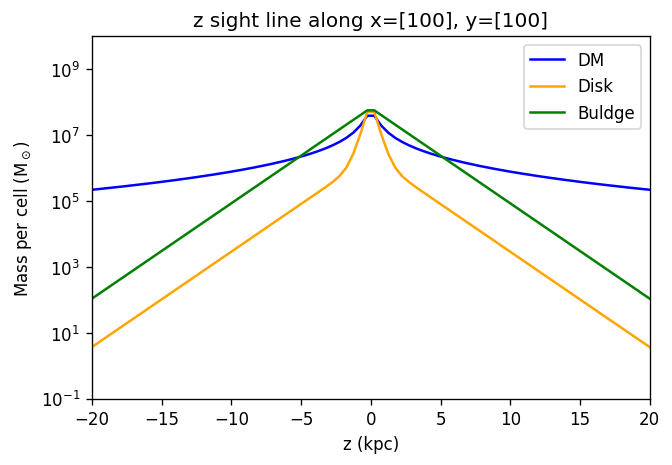

In [184]:
# YOUR CODE HERE: Plot a mass profile along a z-sightline
ix = int(ncells/2)
iy = int(ncells/2)
iz = int(ncells/2)

fig, ax = plt.subplots()
plt.plot(xmids, Mtot_dm[ix,iy,:], color = 'blue', label= 'DM')
plt.plot(xmids, Mtot_disk[ix,iy,:], color = 'orange', label= 'Disk')
plt.plot(xmids, Mtot_buldge[ix,iy,:], color = 'green', label= 'Buldge')
# plt.plot(xmids, rho[ix,iy,:], color = 'blue', label= 'DM')
# plt.plot(xmids, rhoDisk[ix,iy,:], color = 'orange', label= 'Disk')
# plt.plot(xmids, rhoBuldge[ix,iy,:], color = 'green', label= 'Buldge')

ax.set_xlabel('z (kpc)')
ax.set_ylabel(r'Mass per cell (M$_\odot$)')
ax.set_xlim([-20,20])
ax.set_ylim([10**(-1),10**(10)])
ax.set_yscale('log')
ax.set_title('z sight line along x='+str([ix])+', y='+str([iy]))
ax.legend()

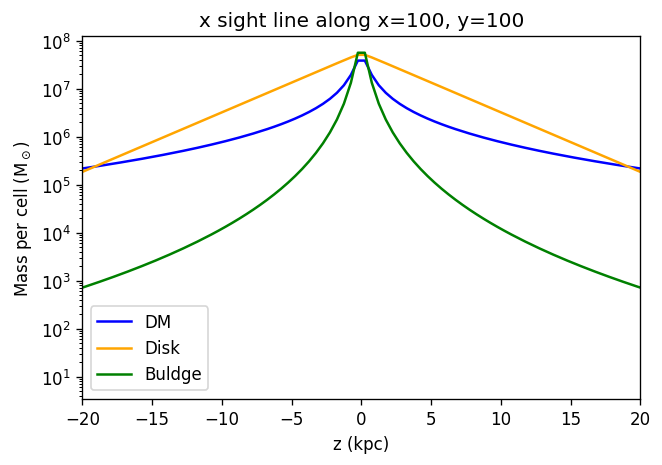

In [172]:
# YOUR CODE HERE: Plot a mass profile along an x-sightline
fig, ax = plt.subplots()
plt.plot(xmids, Mtot_dm[:,iy,iz], color = 'blue', label= 'DM')
plt.plot(xmids, Mtot_disk[:,iy,iz], color = 'orange', label= 'Disk')
plt.plot(xmids, Mtot_buldge[:,iy,iz], color = 'green', label= 'Buldge')

ax.set_xlabel('z (kpc)')
ax.set_ylabel(r'Mass per cell (M$_\odot$)')
ax.set_xlim([-20,20])
ax.set_yscale('log')
ax.set_title('x sight line along x='+str(ix)+', y='+str(iy))
ax.legend()

## Calculate the gravitational acceleration as a function of radius (10 points)

Now that we know how the stellar and dark matter mass is distributed, we can calculate the total gravitational acceleration felt by a test particle on the midplane of the disk.  Rather than doing a complicated integral over all of those continuous functions, we can instead "brute-force" the calculation by summing the individual gravitational forces from each cell:

$$ \vec{a}_{\rm grav} = \sum_i \frac{G m_i}{r_i^2} \hat{r}_i$$

where $m_i$ is the mass contained in cell $i$, $r_i$ is the distance between the cell and the test particle, and $\hat{r}_i$ is the unit vector towards the cell from the test particle.

To calculate the circular velocity, we want the total gravitational acceleration *in the radial direction*.  We can sidestep the vector math and make our lives a lot easier by placing our test particles along the x-axis (that is, such that $y=z=0$) so that the $r$- and $x$-directions are aligned, and we only want the x-component of the gravitational force.  In that case,

$$ a_{x,{\rm grav}} = \sum_i \frac{G m_i}{r_i^2} \frac{x_i - x_{\rm test}}{r_i}$$

Use the expression above to calculate the gravitational acceleration in the radial direction for a series of test particles along the x-axis out to $x=25$ kpc.  

(Note 1: Pay attention to your units when you bring in the gravitational constant!)

(Note 2: You should still be keeping track of the acceleration due to dark matter and stars separately.)

(Note 3: This is the most computationally-intensive part of the calculation, so you may want to start with a small number of test particles and/or go back and reduce the resolution of your arrays until you've finished testing your code.)

In [181]:
# YOUR CODE HERE: Calculate the total radial acceleration due to stars and dark matter
#                 for test particles on the x-axis.

# make the matrix with all of your masses 
msun = 2.0*10**30
# convert to kilograms 
totalMass = (Mtot_disk+Mtot_buldge+Mtot_dm)*msun
DMmass = Mtot_dm*msun
diskBuldge = (Mtot_disk + Mtot_buldge) * msun

# make the radial vector: begin by making an array of locations for the position of the x particle --> we want to determine its velocity as a function of position 
xtest = np.linspace(0,26,50)

# gravitational constant 
gravConst = 6.67*10**(-11)

totAcc = [] 
DMAcc = []
diskBuldgeAcc = []
# define gravitational constant 
for pos in xtest: 
    # convert to meters 
    radialDistance = np.sqrt((x-pos)**2 + y**2 + z**2)*3.0*10**(19)
    xdiff = (x-pos)*3.0*10**(19)

    # calculate the acc due to gravity for All, DM, stars, respectively 
    totAcc.append(np.abs(np.sum((gravConst*totalMass)/(radialDistance**2) * xdiff/radialDistance)))
    DMAcc.append(np.abs(np.sum((gravConst*DMmass)/(radialDistance**2) * xdiff/radialDistance)))
    diskBuldgeAcc.append(np.abs(np.sum((gravConst*diskBuldge)/(radialDistance**2) * xdiff/radialDistance)))
    

## Plot the rotation curves! (9 points)

Given the radial gravitational acceleration as a function of radial distance along the midplane, you can now plot the galaxy rotation curve.  Convert $a_{r,{\rm grav}}$ to $v_{\rm circ}$ and plot (i) the total circular velocity, (ii) the component of the circular velocity due to the mass of stars in the galaxy, and (iii) the component due to the mass of dark matter in the galaxy.  Make sure to convert your velocities to km/s.  

If all has gone well, you should see the famous plot showing that while the circular velocity predicted from the stellar mass rises and falls, the total circular velocity levels off around 200 km/s!

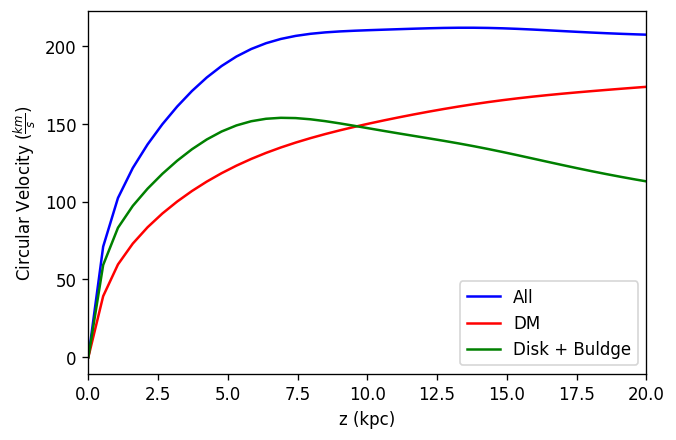

In [182]:
# YOUR CODE HERE: Plot circular velocity profiles (total, DM, and stars)
fig, ax = plt.subplots()
# centrip. acc is a = v^2/r --> v = (a*r)^.5; make sure to convert xtest to km
plt.plot(xtest, np.sqrt(totAcc*xtest*3.e19)/1000, color = 'blue', label = 'All')
plt.plot(xtest, np.sqrt(DMAcc*xtest*3.0e19)/1000, color = 'red', label = 'DM')
plt.plot(xtest, np.sqrt(diskBuldgeAcc*xtest*3.0e19)/1000, color = 'green', label = 'Disk + Buldge')

ax.set_xlabel('z (kpc)')
ax.set_ylabel(r'Circular Velocity ($\frac{km}{s}$)')
ax.set_xlim([0,20])
ax.set_title("")
ax.legend()



Congrats, you made it to the end!

**(1 point)**: How difficult was this assignment?  Did you feel prepared to take it on, or was it totally bewildering?

*Your response here*

10 being the most difficult and 0 being very easy, I'd rate the assignment a 6/10. Initially I was intimidated to work with 3D arrays but after reading the documentation I became much more comfortbale. I also found the diagram you provided to be very helpful. 